In [1]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# data (as pandas dataframes)
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

# metadata
# print(predict_students_dropout_and_academic_success.metadata)

# variable information
# print(predict_students_dropout_and_academic_success.variable

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


# # converting X and y to single dataset
# ds = pd.concat([X, y], axis=1)

# # saving dataset to csv
# ds.to_csv('student_dropout.csv', index=False)

DATASET

Realinho,Valentim, Vieira Martins,Mónica, Machado,Jorge, and Baptista,Luís. (2021). Predict students' dropout and academic success. UCI Machine Learning Repository. https://doi.org/10.24432/C5MC89.

In [3]:
# loading dataset
ds = pd.read_csv('student_dropout.csv')

In [4]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

# Display the first few rows of the dataset to understand its structure
# print(ds.head())

# Choose a specific column for the normality check
# Replace 'your_column_name' with the actual column name you want to check
# Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,
# Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target

# selected_cols = ds.drop("Target", axis=1).columns
# print(selected_cols)

In [6]:
ds.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [7]:
df = ds.copy()

In [8]:
# unique values in target variable
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [9]:
# replacing target values 'Dropout', 'Graduate', 'Enrolled' with 0, 1, 2 respectively
df['Target'] = df['Target'].replace(['Dropout', 'Graduate', 'Enrolled'], [0, 1, 2])

In [10]:
df.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [11]:
df['Target'].unique()

array([0, 1, 2], dtype=int64)

In [12]:
features = df.drop('Target', axis=1)
features

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


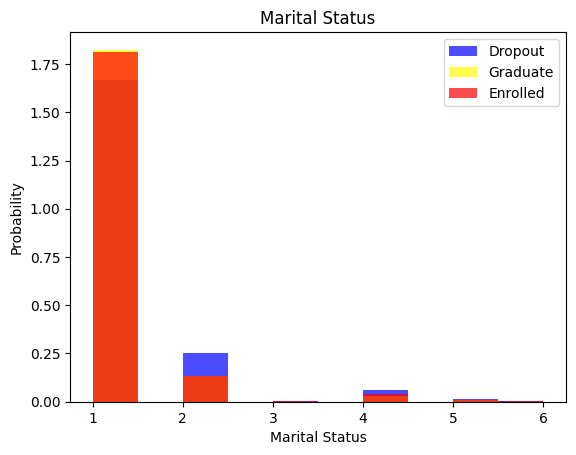

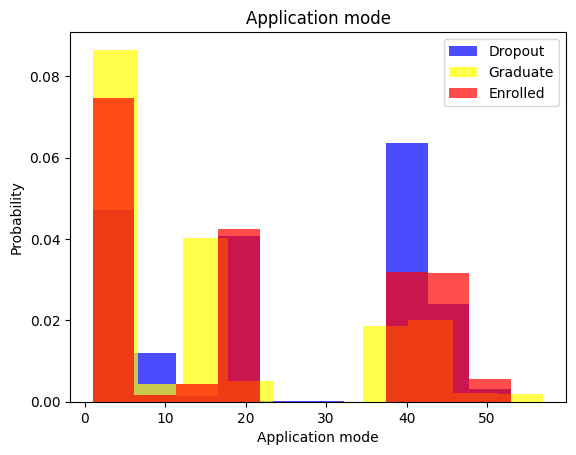

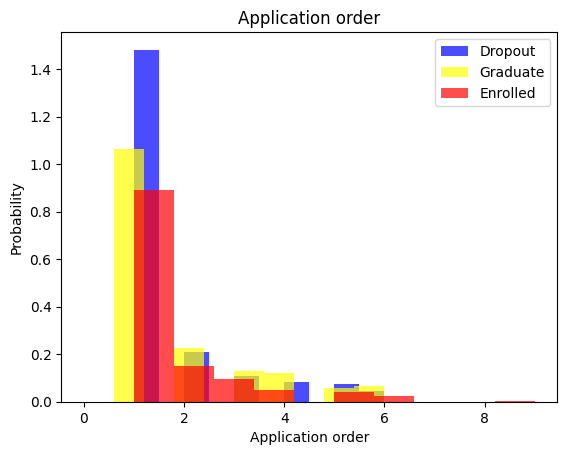

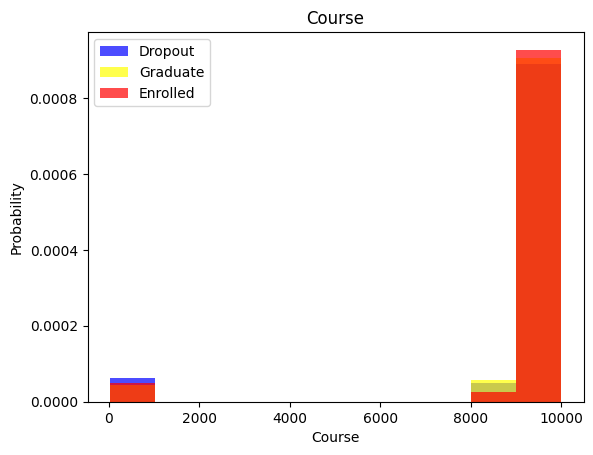

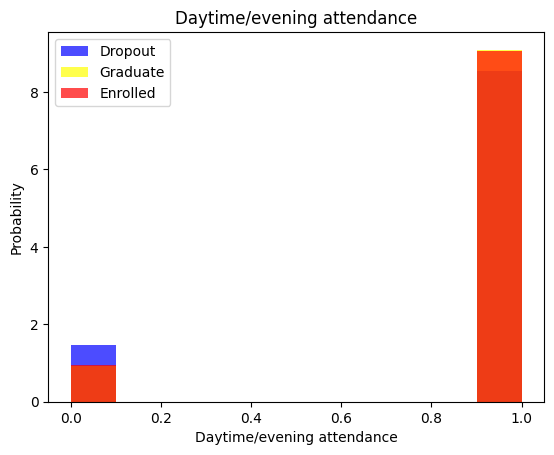

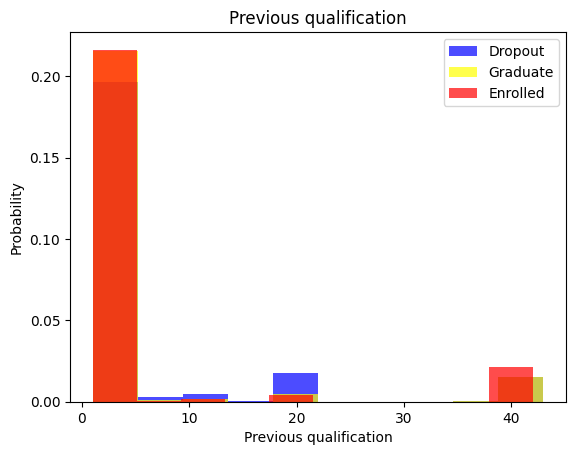

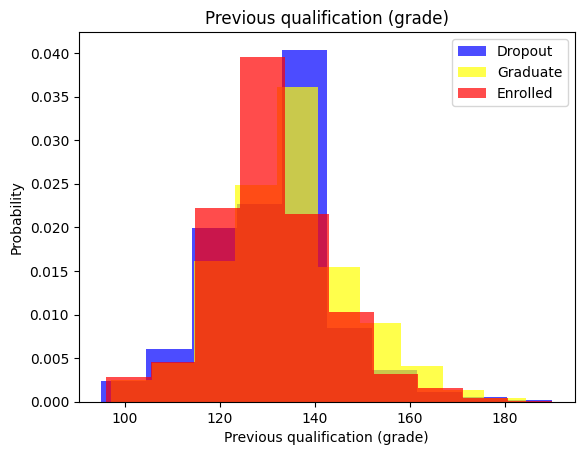

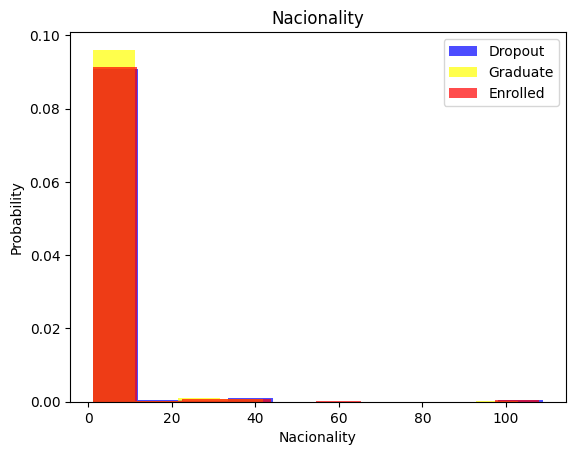

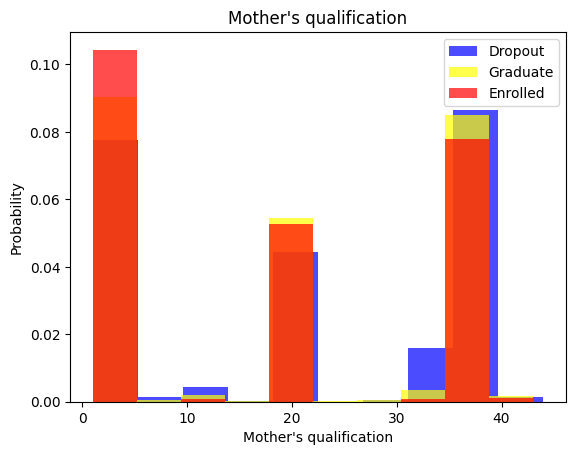

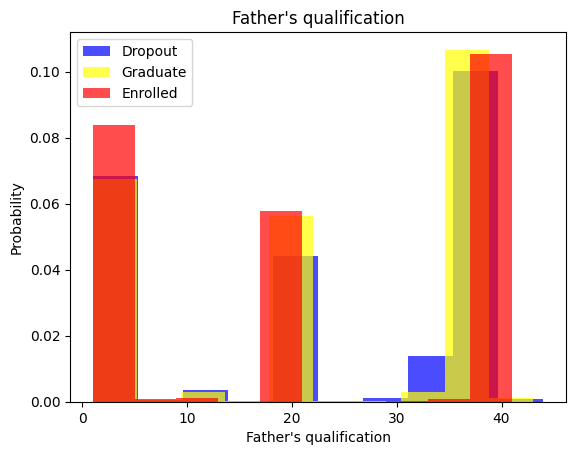

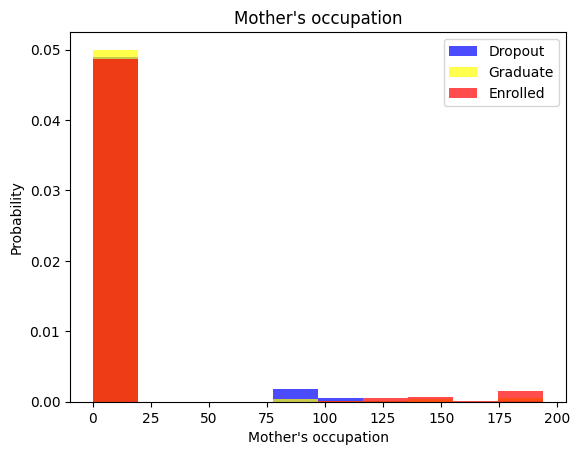

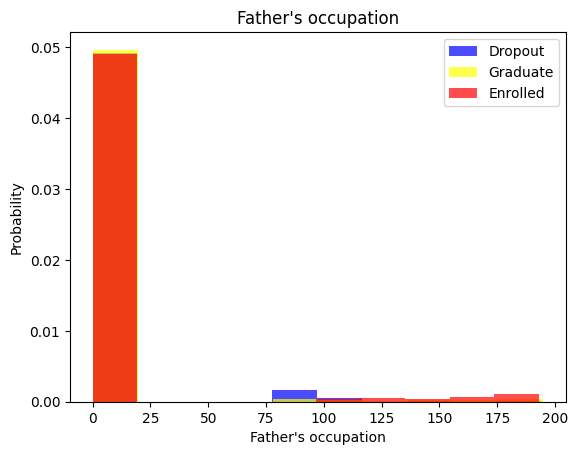

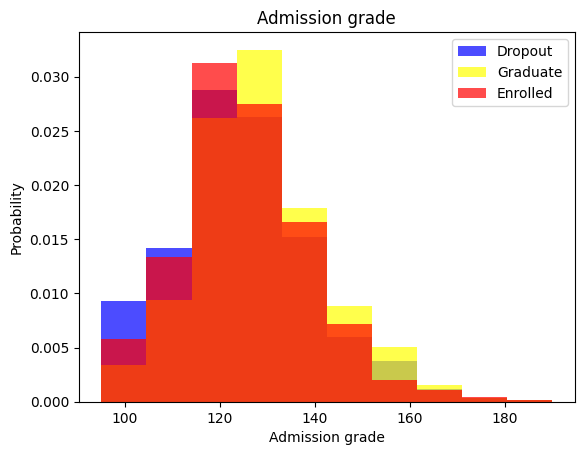

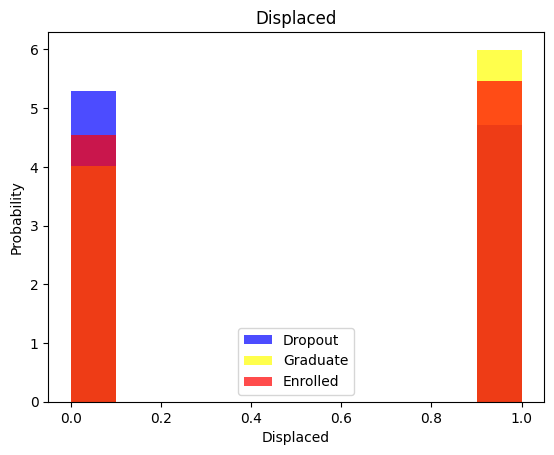

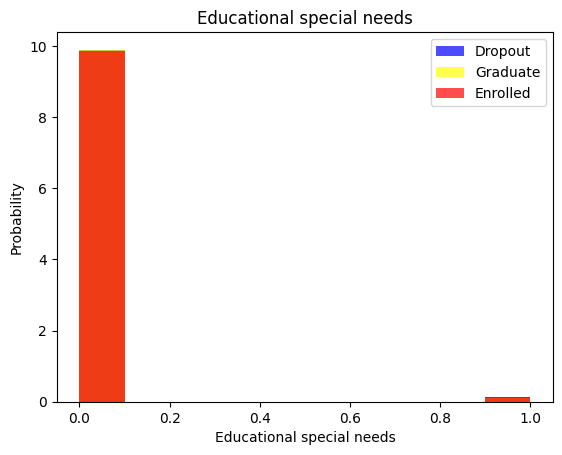

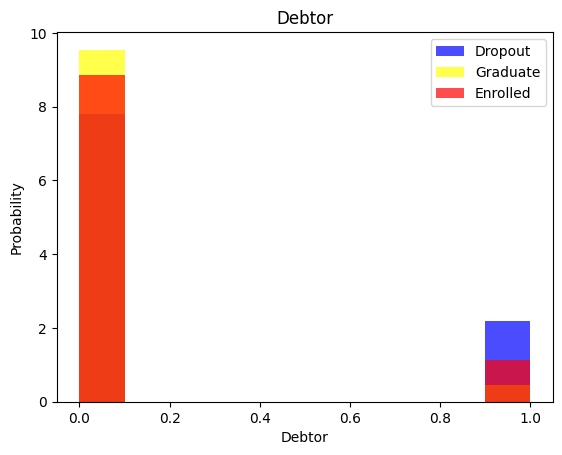

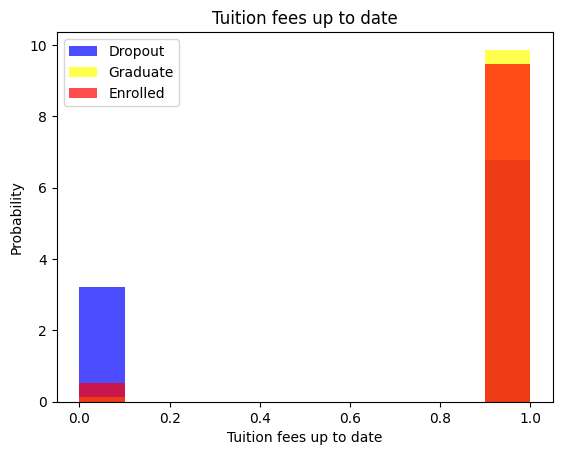

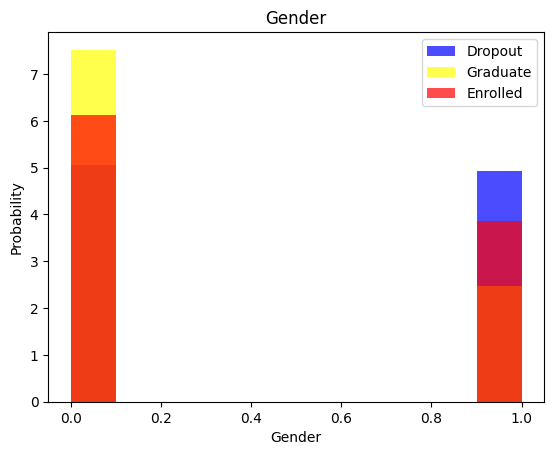

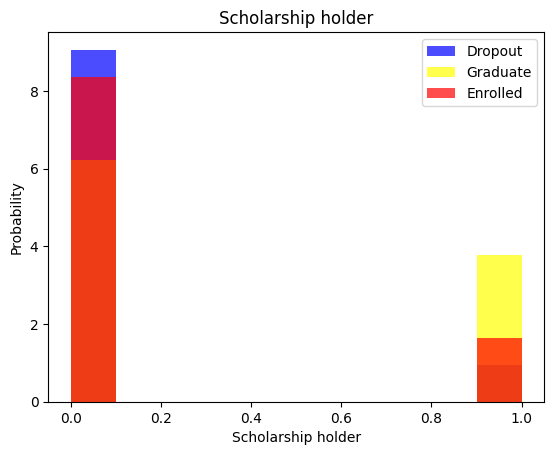

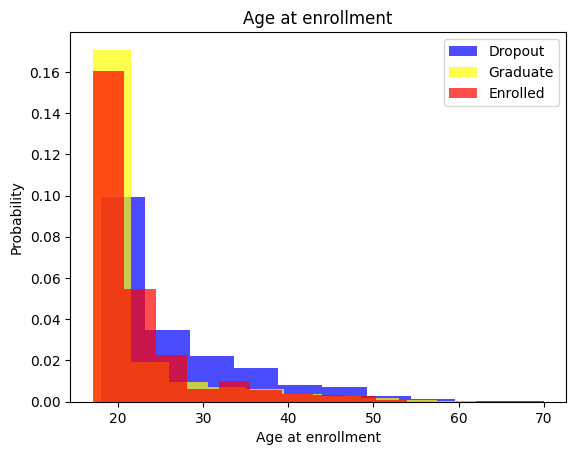

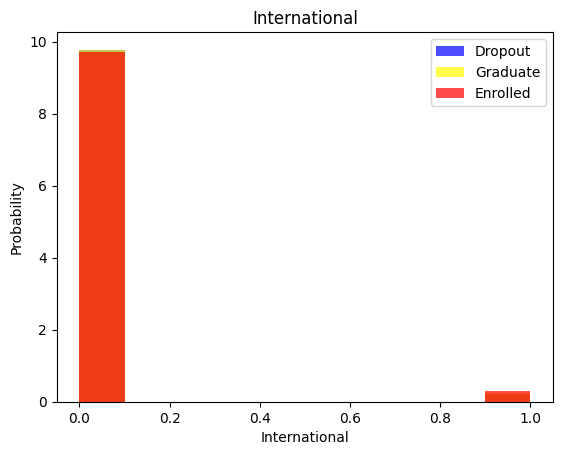

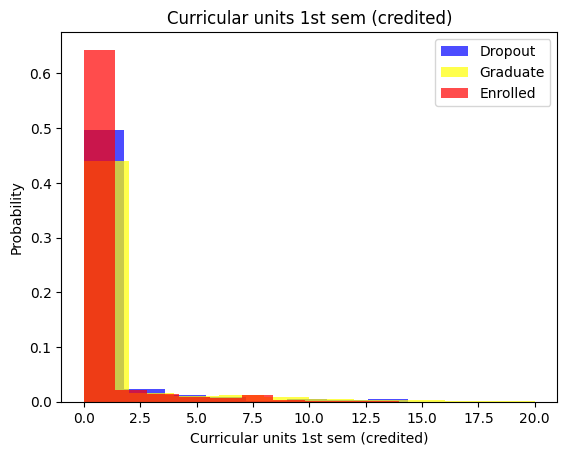

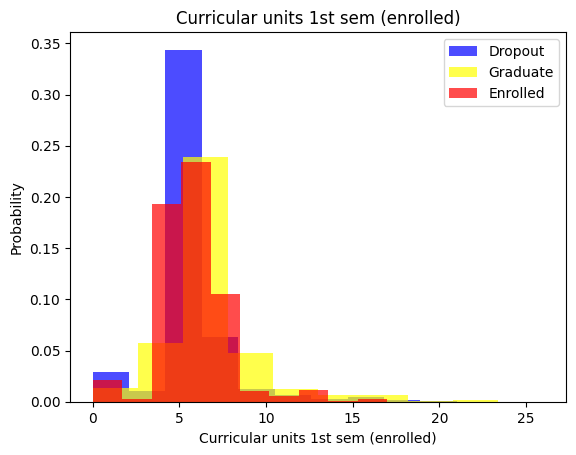

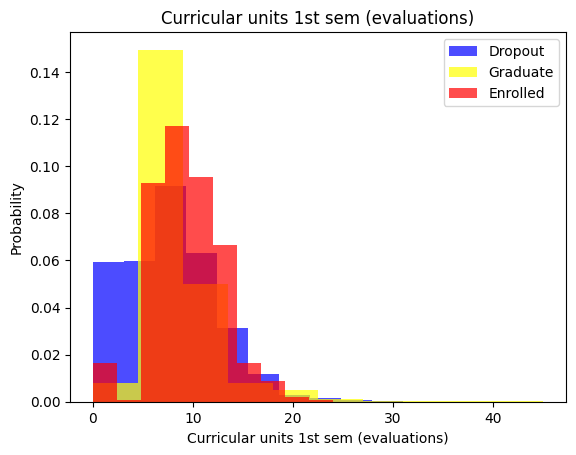

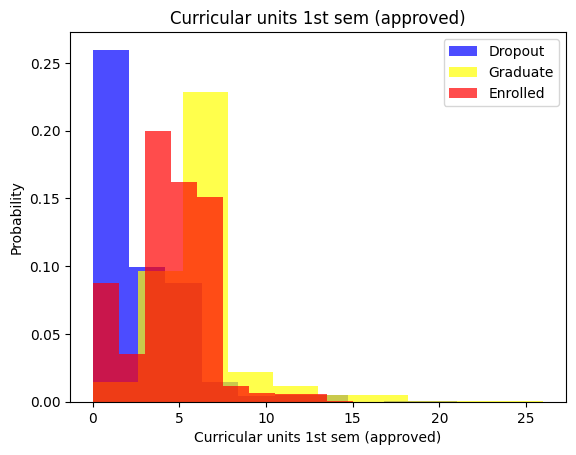

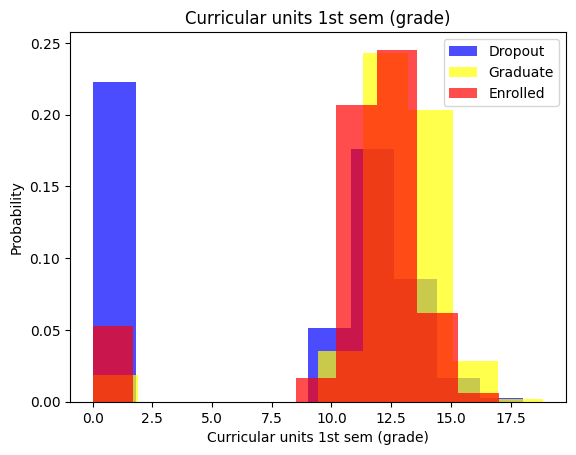

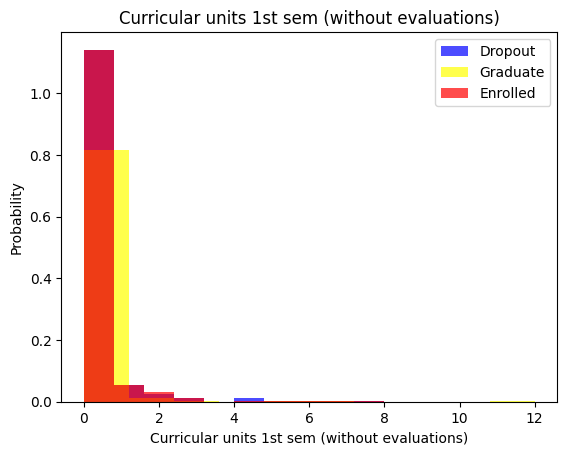

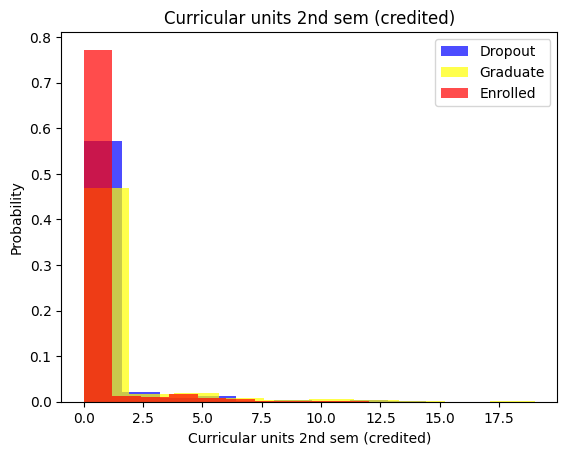

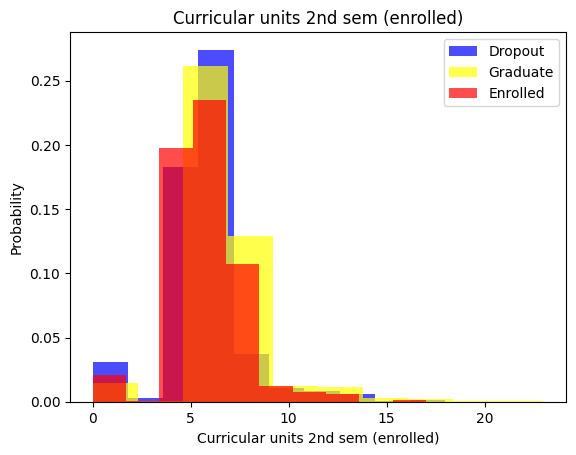

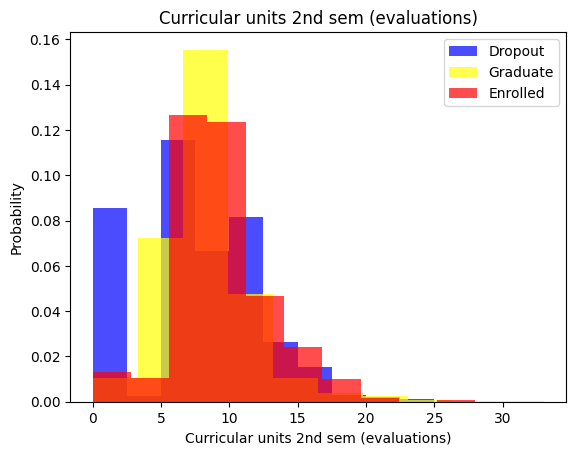

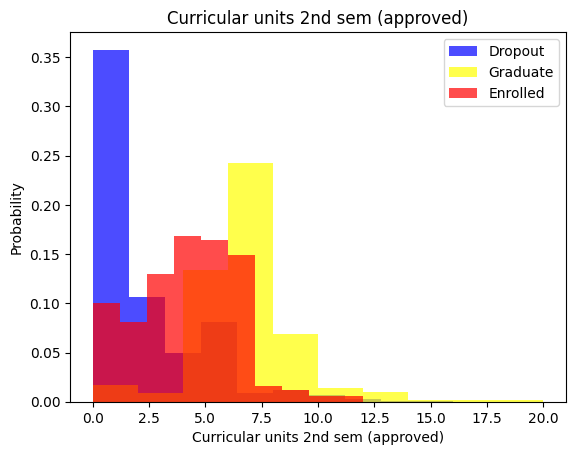

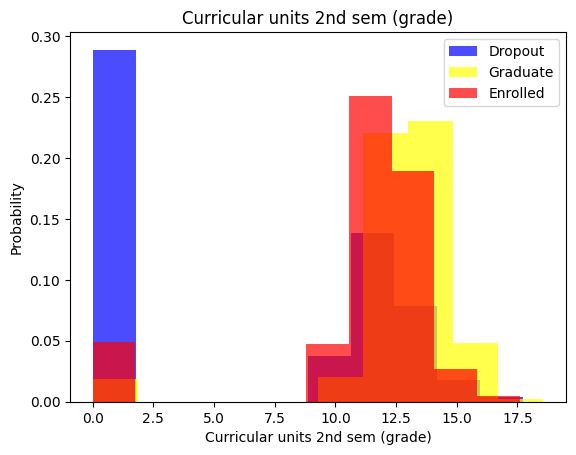

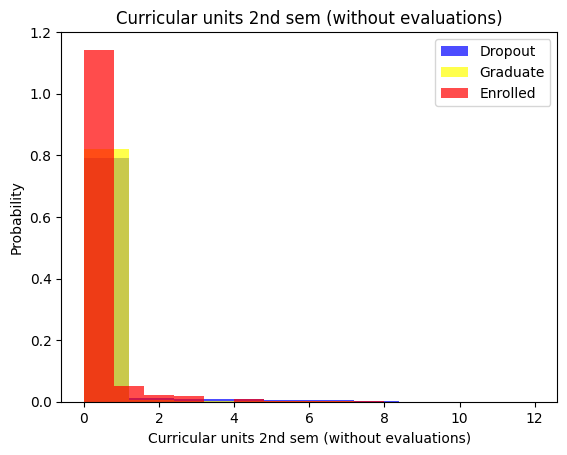

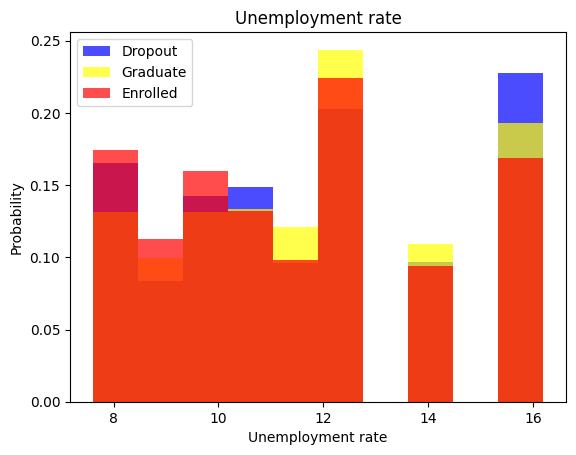

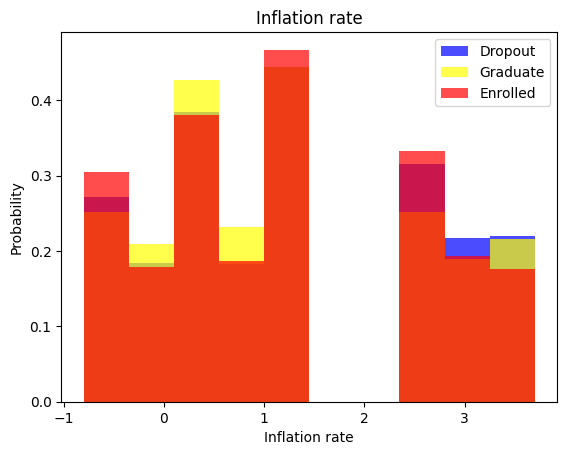

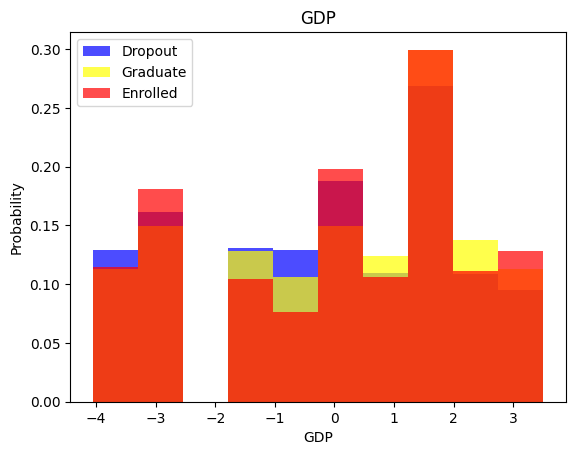

In [13]:
for label in features.columns:
    plt.hist(df[df["Target"] == 0][label], color='blue',
             alpha=0.7, label='Dropout', density=True)
    plt.hist(df[df["Target"] == 1][label], color='yellow',
             alpha=0.7, label='Graduate', density=True)
    plt.hist(df[df["Target"] == 2][label], color='red',
             alpha=0.7, label='Enrolled', density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

Train, Validation and Test sets

In [14]:
train, validation, test = np.split(
    df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
# kde plot
for label in features.columns:
    plt.figure(figsize=(12, 6))
    sn.kdeplot(train[train["Target"] == 0][label],
               color='blue', alpha=0.7, label='Dropout', shade=True)
    sn.kdeplot(train[train["Target"] == 1][label],
               color='yellow', alpha=0.7, label='Graduate', shade=True)
    sn.kdeplot(train[train["Target"] == 2][label], color='red',
               alpha=0.7, label='Enrolled', shade=True)
    plt.title(label)

In [15]:
# scale so it will close to mean or median
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# def scale_dataset(dataframe, oversample=False):
#     X = dataframe[dataframe.columns[:-1]].values #2d
#     y = dataframe[dataframe.columns[-1]].values #1d

#     scaler = StandardScaler()
#     X = scaler.fit_transform(X)

#     # whole dataset as 2d numpy array
#     # -1 = len(y)

#     if oversample:
#         ros = RandomOverSampler(random_state=42)
#         X, y = ros.fit_resample(X, y)

#     data = np.hstack((X, np.reshape(y, (-1, 1))))

#     return data, X, y


def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values  # 2d
    y = dataframe[dataframe.columns[-1]].values  # 1d

    X = (X - X.mean(axis=0)) / X.std(axis=0)

    # whole dataset as 2d numpy array
    # -1 = len(y)

    if oversample:
        ros = RandomOverSampler(random_state=42)
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [16]:
print(len(train[train['Target'] == 0]))  # dropout
print(len(train[train['Target'] == 1]))  # graduate
print(len(train[train['Target'] == 2])) #enrolled

830
1358
466


In [17]:
# for validation
print(len(validation[validation['Target'] == 0]))  # dropout
print(len(validation[validation['Target'] == 1]))  # graduate
print(len(validation[validation['Target'] == 2])) #enrolled

300
424
161


In [18]:
# for test
print(len(test[test['Target'] == 0]))  # dropout
print(len(test[test['Target'] == 1]))  # graduate
print(len(test[test['Target'] == 2])) #enrolled

291
427
167


over sampling is required to increasw the number of minority class so that the model can have equal number of samples from both classes

In [19]:
training, x, y = scale_dataset(train, oversample=True)
valid, x_val, y_val = scale_dataset(validation)
testing, x_test, y_test = scale_dataset(test)

In [20]:
print(training.shape)

(4074, 37)


In [21]:
training_df = pd.DataFrame(training)
training_df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,-0.294692,-1.004202,1.716563,0.116093,0.359000,-0.356355,0.409643,-0.11864,-1.070720,-1.393136,...,-0.287258,-0.116237,0.478252,0.499863,0.539261,-0.205487,0.302680,-0.529559,0.794290,1.0
1,-0.294692,-1.004202,0.205532,-0.394590,-2.785512,-0.356355,-2.774827,-0.11864,-1.070720,-1.393136,...,-0.287258,-0.116237,0.224091,-0.169479,0.178712,-0.205487,-0.822039,-1.467198,-1.384016,2.0
2,-0.294692,1.389289,-0.549983,-0.394590,-2.785512,-0.356355,2.153520,-0.11864,-0.043703,0.954450,...,4.441505,2.142131,0.732414,2.173220,0.324008,-0.205487,0.415151,1.778476,-0.754037,1.0
3,1.358822,1.161337,-0.549983,0.548099,-2.785512,-0.356355,-1.713337,-0.11864,1.111690,0.954450,...,-0.287258,-0.567911,-2.063362,-1.508165,-2.000724,-0.205487,0.415151,1.778476,-0.754037,0.0
4,-0.294692,-1.004202,0.205532,0.313977,0.359000,-0.356355,-2.547365,-0.11864,-1.199097,-1.262715,...,-0.287258,0.787110,0.224091,0.834535,0.542643,-0.205487,0.865039,-1.106568,0.350643,1.0


In [ ]:
# kde plot with training data
for label in range(training_df.shape[1]-1):
    plt.figure(figsize=(12, 6))
    sn.kdeplot(training_df[training_df[training_df.columns[-1]] == 0]
               [label], color='blue', alpha=0.7, label='Dropout', shade=True)
    sn.kdeplot(training_df[training_df[training_df.columns[-1]] == 1]
               [label], color='yellow', alpha=0.7, label='Graduate', shade=True)
    sn.kdeplot(training_df[training_df[training_df.columns[-1]] == 2]
               [label], color='red', alpha=0.7, label='Enrolled', shade=True)
    plt.title(label)

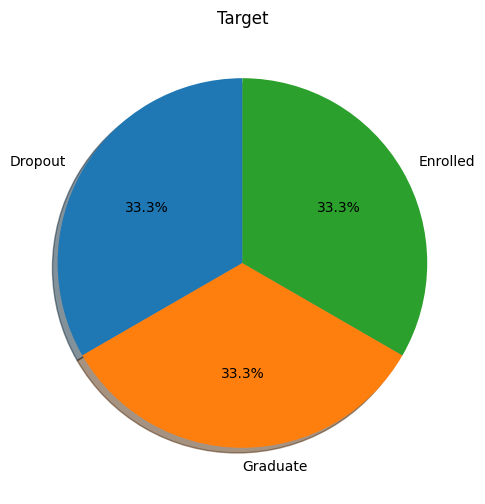

In [22]:
# pie chart for training data target
plt.figure(figsize=(12, 6))
plt.pie(training_df[training_df.columns[-1]].value_counts(), labels=['Dropout',
        'Graduate', 'Enrolled'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Target')
plt.show()

KNN

it measures the euclidean distance of new points to the other points to conclude which labeled points are closer to the new point

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [24]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x, y)

KNeighborsClassifier(n_neighbors=3)

In [25]:
y_pred_val = knn_model.predict(x_val)

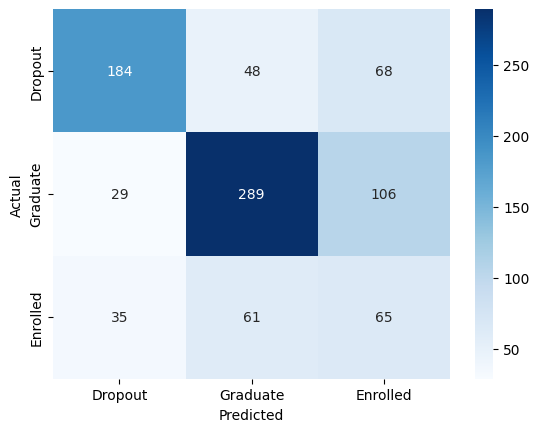

In [26]:
import seaborn as sn
# print confusion matrix with labels also printed
cm = confusion_matrix(y_val, y_pred_val)

classes = ['Dropout', 'Graduate', 'Enrolled']

sn.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=classes, yticklabels=classes)

figsize = (10, 7)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
# classification report
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.74      0.61      0.67       300
           1       0.73      0.68      0.70       424
           2       0.27      0.40      0.33       161

    accuracy                           0.61       885
   macro avg       0.58      0.57      0.57       885
weighted avg       0.65      0.61      0.62       885



In [28]:
# for testing
y_pred_test = knn_model.predict(x_test)

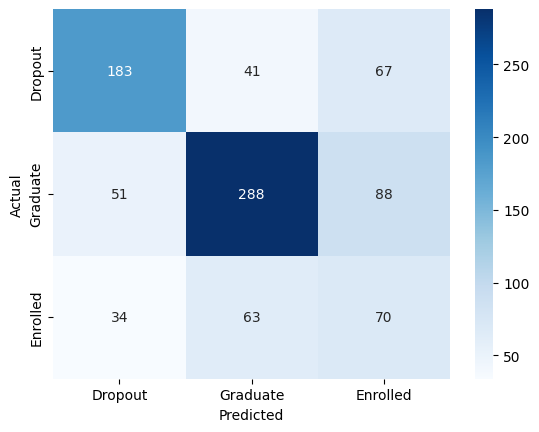

In [29]:
import seaborn as sn
# print confusion matrix with labels also printed
cm = confusion_matrix(y_test, y_pred_test)

classes = ['Dropout', 'Graduate', 'Enrolled']

sn.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=classes, yticklabels=classes)

figsize = (10, 7)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
# classification report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.68      0.63      0.65       291
           1       0.73      0.67      0.70       427
           2       0.31      0.42      0.36       167

    accuracy                           0.61       885
   macro avg       0.58      0.57      0.57       885
weighted avg       0.64      0.61      0.62       885

